In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.utils import class_weight
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.applications.inception_v3 import InceptionV3, preprocess_input
    
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob
from PIL import ImageFile       

from keras.preprocessing import image                  
from tqdm import tqdm

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras import applications
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import keras
from sklearn.metrics import accuracy_score
from vecstack import stacking
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.models import Sequential
from keras.models import Model
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
from keras import optimizers, losses, activations, models
from keras.layers import Convolution2D, Dense, Input, Flatten, Dropout, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Concatenate
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
import os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
print(os.listdir("../input"))

import os
print(os.listdir("../input"))

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


['chest_xray_kag']
['chest_xray_kag']
['chest_xray_kag']


In [2]:
#print(os.listdir("../input/inception-v3/inception_v3.ckpt"))

In [3]:
def load_dataset(path):
    data = load_files(path)
    chest_files = np.array(data['filenames'])
    chest_targets = np_utils.to_categorical(np.array(data['target']), 2)
    return chest_files, chest_targets

**Train Files and Testing files are loaded**


In [4]:
train_files, train_targets = load_dataset('../input/chest_xray_kag/chest_xray/train')
valid_files, valid_targets = load_dataset('../input/chest_xray_kag/chest_xray/test')

In [5]:
tf , t_targets = load_dataset('../input/chest_xray_kag/chest_xray/train')

In [ ]:
train_targets.shape

In [6]:
def path_to_tensor(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

**All files are converted to 4-d tensors for pre-trained cnn architectures**

In [7]:
train_tensors = paths_to_tensor(train_files).astype('float32')/255
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255

100%|██████████| 624/624 [00:06<00:00, 101.97it/s]


In [8]:
def extract_InceptionV3(tensor):
    #from keras.applications.inception_v3 import InceptionV3, preprocess_input
    return InceptionV3(weights='imagenet', include_top=False).predict(preprocess_input(tensor))

def extract_VGG16(tensor):
    from keras.applications.vgg16 import VGG16, preprocess_input
    return VGG16(weights='imagenet', include_top=False).predict(preprocess_input(tensor))

def extract_VGG19(tensor):
    from keras.applications.vgg19 import VGG19, preprocess_input
    return VGG19(weights='imagenet', include_top=False).predict(preprocess_input(tensor))

def extract_Resnet50(tensor):
    from keras.applications.resnet50 import ResNet50, preprocess_input
    return ResNet50(weights='imagenet', include_top=False).predict(preprocess_input(tensor))

def extract_Xception(tensor):
    from keras.applications.xception import Xception, preprocess_input
    return Xception(weights='imagenet', include_top=False).predict(preprocess_input(tensor))

**Features are extracted from the Inception and Resnet model for the training and testing tensors**

In [9]:
training_incpetion = extract_InceptionV3(train_tensors)

#testing_incpetion = extract_InceptionV3(valid_tensors)
#extract_Xception(train_tensors)
#extract_Resnet50(train_tensors)
#extract_VGG19(train_tensors)
#extract_VGG16(train_tensors)

87916544/87910968 [==============================] - 3s 0us/step


In [ ]:
#training_xception = extract_Xception(train_tensors)

In [10]:
training_resnet = extract_Resnet50(train_tensors)


/opt/conda/lib/python3.6/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 3s 0us/step


In [ ]:
#training_vgg19 = extract_VGG19(train_tensors)

In [ ]:

#training_vgg16 = extract_VGG16(train_tensors)

In [11]:
testing_incpetion = extract_InceptionV3(valid_tensors)

In [ ]:
#testing_xcpetion = extract_Xception(valid_tensors)

In [12]:
testing_resnet = extract_Resnet50(valid_tensors)

/opt/conda/lib/python3.6/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [ ]:
#testing_vgg19 = extract_VGG19(valid_tensors)

In [ ]:
#testing_vgg16 = extract_VGG16(valid_tensors)

**Inception and Resnet models are finetuned with pooling and dense layers**

In [13]:
inception = Sequential()
inception.add(GlobalAveragePooling2D(input_shape=training_incpetion.shape[1:]))
inception.add(Dense(1024, activation='relu'))
inception.add(Dense(2, activation='sigmoid'))
#inception.add(Dense(n_class, activation='softmax'))

inception.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'],
           )
inception.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 2050      
Total params: 2,100,226
Trainable params: 2,100,226
Non-trainable params: 0
_________________________________________________________________


In [14]:
Resnet_model = Sequential()
Resnet_model.add(GlobalAveragePooling2D(input_shape=training_resnet.shape[1:]))
Resnet_model.add(Dense(1024, activation='relu'))
#Resnet_model.add(Dropout(0.2))
#Resnet_model.add(Dense(512, activation='relu'))


#Resnet_model.add(Dropout(0.2, input_shape=training_resnet.shape[1:]))
Resnet_model.add(Dense(2, activation='sigmoid'))

Resnet_model.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'],
           )

Resnet_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 2050      
Total params: 2,100,226
Trainable params: 2,100,226
Non-trainable params: 0
_________________________________________________________________


**Making own CNN with data augmentation**

In [15]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
model.add(Flatten()) 
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [17]:

batch_size = 16
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        '../input/chest_xray_kag/chest_xray/train',  
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='binary')  
validation_generator = test_datagen.flow_from_directory(
        '../input/chest_xray_kag/chest_xray/test',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [18]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=15,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)
model.save_weights('first_try.h5')


Epoch 1/15
125/125 [==============================] - 59s 475ms/step - loss: 0.4700 - acc: 0.7690 - val_loss: 0.7025 - val_acc: 0.6637
Epoch 2/15
125/125 [==============================] - 54s 435ms/step - loss: 0.3820 - acc: 0.8300 - val_loss: 0.8543 - val_acc: 0.6875
Epoch 3/15
125/125 [==============================] - 53s 421ms/step - loss: 0.3212 - acc: 0.8675 - val_loss: 0.5997 - val_acc: 0.7400
Epoch 4/15
125/125 [==============================] - 56s 448ms/step - loss: 0.3121 - acc: 0.8745 - val_loss: 0.4981 - val_acc: 0.7175
Epoch 5/15
125/125 [==============================] - 56s 445ms/step - loss: 0.3043 - acc: 0.8775 - val_loss: 0.6149 - val_acc: 0.7700
Epoch 6/15
125/125 [==============================] - 54s 434ms/step - loss: 0.2693 - acc: 0.8990 - val_loss: 0.8361 - val_acc: 0.7425
Epoch 7/15
125/125 [==============================] - 56s 448ms/step - loss: 0.2756 - acc: 0.9040 - val_loss: 0.4300 - val_acc: 0.7950
Epoch 8/15
125/125 [==============================] - 5

In [19]:
 inception_history = inception.fit(training_incpetion, train_targets, 
          validation_data=(testing_incpetion, valid_targets),
          epochs=50, 
          #callbacks=inception_callbacks,
          #class_weight=class_weight,
          batch_size=16, verbose=1)

Train on 5216 samples, validate on 624 samples
Epoch 1/50
5216/5216 [==============================] - 8s 1ms/step - loss: 0.3009 - acc: 0.8659 - val_loss: 0.4870 - val_acc: 0.7764
Epoch 2/50
5216/5216 [==============================] - 4s 708us/step - loss: 0.1802 - acc: 0.9271 - val_loss: 0.7657 - val_acc: 0.7067
Epoch 3/50
5216/5216 [==============================] - 4s 711us/step - loss: 0.1688 - acc: 0.9300 - val_loss: 0.5680 - val_acc: 0.7796
Epoch 4/50
5216/5216 [==============================] - 4s 710us/step - loss: 0.1402 - acc: 0.9474 - val_loss: 0.7542 - val_acc: 0.7404
Epoch 5/50
5216/5216 [==============================] - 4s 712us/step - loss: 0.1432 - acc: 0.9456 - val_loss: 0.4990 - val_acc: 0.8141
Epoch 6/50
5216/5216 [==============================] - 4s 704us/step - loss: 0.1268 - acc: 0.9513 - val_loss: 0.5247 - val_acc: 0.8109
Epoch 7/50
5216/5216 [==============================] - 4s 707us/step - loss: 0.1129 - acc: 0.9578 - val_loss: 0.4156 - val_acc: 0.8381
Epo

In [20]:
 resnet_history =Resnet_model.fit(training_resnet, train_targets, 
          validation_data=(testing_resnet, valid_targets),
          epochs=10, 
          #callbacks=inception_callbacks,
          #class_weight=class_weight,
          batch_size=16, verbose=1)

Train on 5216 samples, validate on 624 samples
Epoch 1/10
5216/5216 [==============================] - 8s 2ms/step - loss: 0.6032 - acc: 0.7304 - val_loss: 0.6726 - val_acc: 0.6250
Epoch 2/10
5216/5216 [==============================] - 4s 774us/step - loss: 0.5741 - acc: 0.7429 - val_loss: 0.7319 - val_acc: 0.6250
Epoch 3/10
5216/5216 [==============================] - 4s 779us/step - loss: 0.5747 - acc: 0.7429 - val_loss: 0.6712 - val_acc: 0.6250
Epoch 4/10
5216/5216 [==============================] - 4s 772us/step - loss: 0.5737 - acc: 0.7429 - val_loss: 0.6987 - val_acc: 0.6250
Epoch 5/10
5216/5216 [==============================] - 4s 797us/step - loss: 0.5731 - acc: 0.7429 - val_loss: 0.6865 - val_acc: 0.6250
Epoch 6/10
5216/5216 [==============================] - 4s 775us/step - loss: 0.5728 - acc: 0.7429 - val_loss: 0.6823 - val_acc: 0.6250
Epoch 7/10
5216/5216 [==============================] - 4s 771us/step - loss: 0.5717 - acc: 0.7429 - val_loss: 0.7264 - val_acc: 0.6250
Epo

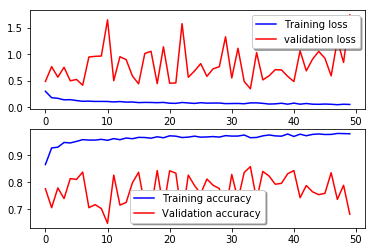

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,1)
ax[0].plot(inception_history.history['loss'], color='b', label="Training loss")
ax[0].plot(inception_history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(inception_history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(inception_history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

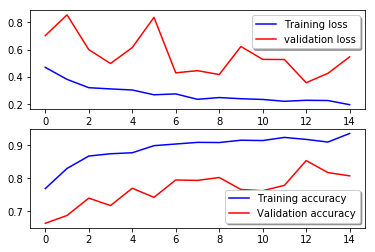

In [22]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

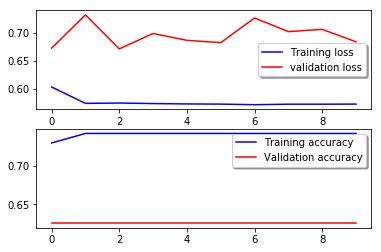

In [23]:
fig, ax = plt.subplots(2,1)
ax[0].plot(resnet_history.history['loss'], color='b', label="Training loss")
ax[0].plot(resnet_history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(resnet_history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(resnet_history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

**All predictions are taken and put in a 2d matrix form for ensembling**

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
Y_pred = inception.predict(training_incpetion)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_pred_testing = inception.predict(testing_incpetion)
Y_pred_classes_testing = np.argmax(Y_pred_testing,axis=1)

Y_pred_cnn = model.predict(train_tensors)
Y_pred_classes_cnn = np.argmax(Y_pred_cnn,axis = 1) 
Y_pred_cnn_testing = model.predict(valid_tensors)
Y_pred_classes_cnn_testing = np.argmax(Y_pred_cnn_testing,axis = 1)


Y_pred_resnet = Resnet_model.predict(training_resnet)
Y_pred_classes_resnet = np.argmax(Y_pred_resnet,axis = 1) 
Y_pred_resnet_testing = Resnet_model.predict(testing_resnet)
Y_pred_classes_resnet_testing = np.argmax(Y_pred_resnet_testing,axis = 1)


# Convert validation observations to one hot vectors
#Y_true = np.argmax(train_targets,axis = 1) 
# compute the confusion matrix
#confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
#ax = sns.heatmap(confusion_mtx)

In [25]:
train = np.column_stack((Y_pred_classes , Y_pred_classes_cnn , Y_pred_classes_resnet))

In [26]:
test = np.column_stack((Y_pred_classes_testing, Y_pred_classes_cnn_testing,Y_pred_classes_resnet_testing))

**The predictions form the above 3 algorithms are fitted into a 2d mattrix and given to a Neuarl network for prediction**

In [27]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(3,)))
model.add(Dropout(.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='sigmoid'))

# Compiling the model
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               2048      
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
__________

In [28]:

history = model.fit(train, t_targets, epochs=5, batch_size=16, verbose=2)

Epoch 1/5
 - 7s - loss: 0.2316 - acc: 0.9380
Epoch 2/5
 - 3s - loss: 0.1841 - acc: 0.9596
Epoch 3/5
 - 3s - loss: 0.1832 - acc: 0.9597
Epoch 4/5
 - 3s - loss: 0.1783 - acc: 0.9597
Epoch 5/5
 - 3s - loss: 0.1796 - acc: 0.9597


In [32]:
from sklearn.metrics import confusion_matrix
pred = model.predict(train)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(t_targets,axis = 1)

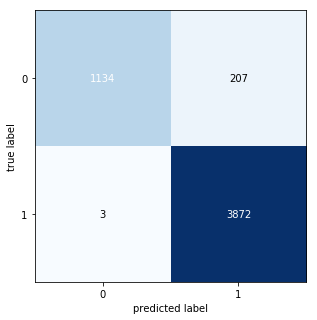

In [33]:
CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()